In [1]:
import numpy as np
import matplotlib.pyplot as plt

La función numerov_step: Implementa el método de Numerov mejorando la precisión para resolver ecuaciones diferenciales de segundo orden. Basandose en dos valores anteriores de la función $\psi(x)$ y los valores de $𝑘(x)^{2}$ para estimar el siguiente valor de $\psi(x)$.

In [3]:
def numerov_step(psi_prev, psi_curr, k_prev, k_curr, k_next, dx):
    """
    Realiza un solo paso del método de Numerov para integrar ecuaciones diferenciales.

    Argumentos:
    - psi_prev: valor de psi en el punto i-1
    - psi_curr: valor de psi en el punto i
    - k_prev, k_curr, k_next: valores de k^2 en i-1, i y i+1
    - dx: paso entre puntos

    Retorna:
    - psi_next: valor de psi en el punto i+1
    """
    # Fórmula del método de Numerov
    numerador = 2 * (1 - (5/12) * dx**2 * k_curr) * psi_curr
    numerador -= (1 + (1/12) * dx**2 * k_prev) * psi_prev
    denominador = 1 + (1/12) * dx**2 * k_next
    psi_next = numerador / denominador
    return psi_next

Esta función calcula la función de onda $\psi(x)$ para una energía dada $E$, en una caja de potencial infinito. La integración se realiza desde $x = 0$ hasta $x = L$ usando el método de Numerov.

In [5]:
def solve_numerov(E, L=1.0, N=1000):
    """
    Resuelve numéricamente la ecuación de Schrödinger para una caja de potencial infinito.

    Argumentos:
    - E: energía tentativa
    - L: longitud de la caja
    - N: número de intervalos (resolución)

    Retorna:
    - x: arreglo de posiciones
    - psi: arreglo con la función de onda ψ(x)
    """
    dx = L / N                         # Paso de malla
    x = np.linspace(0, L, N+1)        # Puntos del dominio [0, L]

    # En unidades naturales (ħ²/2m = 1), k²(x) = E para V(x)=0
    k2 = np.full_like(x, E)

    # Condiciones iniciales
    psi = np.zeros_like(x)            # ψ(0) = 0
    psi[1] = 1e-3                     # Valor pequeño arbitrario en x=dx

    # Usamos el método de Numerov para integrar hacia la derecha
    for i in range(1, N):
        psi[i+1] = numerov_step(psi[i-1], psi[i], k2[i-1], k2[i], k2[i+1], dx)

    return x, psi

Se usa el método de bisección para encontrar un valor de energía $E$ tal que
$\psi(0)=\psi(L) \approx 0$. Condiciones de frontera típica para una caja infinita cuántica.

**🔴 Recordemos el método de la bisección**
 👉 [Ver simulación en GeoGebra](https://www.geogebra.org/m/szYKF7nT)

In [6]:
def energia_biseccion(E1, E2, tol=1e-5):
    """
    Encuentra un valor de energía E tal que ψ(L) = 0 usando el método de bisección.

    Argumentos:
    - E1, E2: extremos del intervalo inicial
    - tol: tolerancia para la convergencia

    Retorna:
    - E que cumple la condición de frontera en x = L
    """
    while abs(E2 - E1) > tol:
        E_mid = (E1 + E2) / 2
        _, psi_mid = solve_numerov(E_mid)
        psi_L_mid = psi_mid[-1]  # Valor de ψ en el borde derecho

        _, psi_E1 = solve_numerov(E1)
        psi_L_E1 = psi_E1[-1]

        # Si hay cambio de signo en ψ(L), hay un cero entre E1 y E_mid
        if psi_L_mid * psi_L_E1 < 0:
            E2 = E_mid
        else:
            E1 = E_mid

    return (E1 + E2) / 2

Calcula un valor de energía permitido (un eigenvalor) para el sistema. Luego obtiene la función de onda correspondiente a ese valor.

In [9]:
# Buscar un valor propio de energía entre 0.1 y 10
E_permitida = energia_biseccion(0.1, 10)

# Resolver la ecuación de Schrödinger para ese valor de energía
x, psi = solve_numerov(E_permitida)

Dibuja la función de onda que debe comenzar y terminar en cero. Muestra el valor de energía correspondiente. La función de onda debe parecerse a una función seno, como las soluciones analíticas del pozo de potencial infinito.

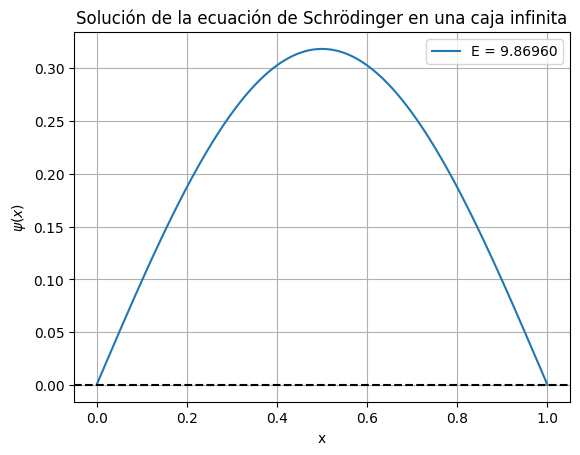

In [10]:
plt.plot(x, psi, label=f'E = {E_permitida:.5f}')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend()
plt.title('Solución de la ecuación de Schrödinger en una caja infinita')
plt.grid()
plt.show()